In [3]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

wl = np.linspace(400, 700, 301)
R05 = pd.read_csv('./spectrum/TPK/R_5_B.csv')['SCAN'][20:-80].values/100
R15 = pd.read_csv('./spectrum/TPK/R_15_B.csv')['SCAN'][20:-80].values/100
R30 = pd.read_csv('./spectrum/TPK/R_30_B.csv')['SCAN'][20:-80].values/100

air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')

In [4]:
def hypo(th, w, angle):
    TM2 = ml.Chromatic_Dispersion(th[6], th[7], 550)
    TM1 = ml.Chromatic_Dispersion(th[8], th[9], 550)
    BM2 = ml.Chromatic_Dispersion(th[10], th[11], 550)
    BM1 = ml.Chromatic_Dispersion(th[12], th[13], 550)
    ITO = ml.Chromatic_Dispersion(th[14], th[15], 550)
    Arc = ml.Chromatic_Dispersion(th[16], th[17], 550)
    hypo_R = tm.Design(
        [air, Arc, TM2, TM1, ITO, BM2, BM1, sodalime],
        [None,th[0],th[1],th[2],th[3],th[4],th[5],None]
    )
    RRR = hypo_R.reflectance(w, angle)
    return RRR

fom = lambda th: np.mean(abs(hypo(th, wl, 5)-R05))

In [5]:
sol = differential_evolution(
    fom, [
        (1050, 1250), # top O.C.
        (21.25,27.25), # top IM 2
        (14.81,20.81), # top IM 1
        (43.64,49.64), # pattern ITO
        (13.11,23.11), # bottom 2
        (21.59,27.59), # bottom 1
        (1.69, 2),(-0.02, -0.2), #TM2
        (1.44, 1.58),(-0.02, -0.2), # TM1
        (1.44, 1.59),(-0.02, -0.2), # BM2
        (1.78, 2),(-0.02, -0.2), # BM1
        (1.75,1.95),(-0.6, -1), # ITO   
        (1.48,1.51),(-0.03, -0.01) # Acrylic
    ]
)
print(sol.x)
print(sol.message)

[ 1.10279385e+03  2.92156137e+01  2.27647115e+01  5.15721392e+01
  2.11051267e+01  2.95475349e+01  1.99904026e+00 -1.98206375e-01
  1.48111016e+00 -1.58337983e-01  1.45224711e+00 -2.26564758e-02
  1.82553752e+00 -2.07197144e-02  1.91108467e+00 -7.13167198e-01
  1.50034538e+00 -2.01350004e-02]
Optimization terminated successfully.


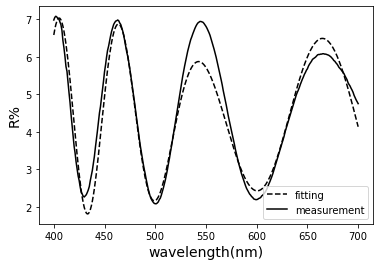

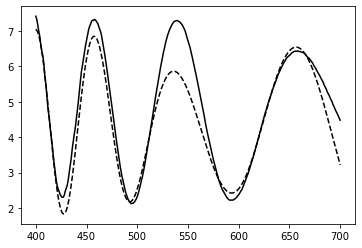

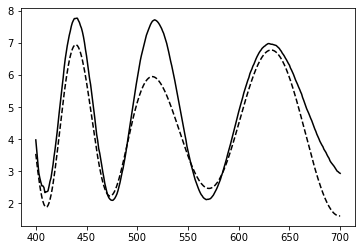

In [6]:
f1 = [ 1.10207914e+03,  28.6,  2.01500752e+01,  4.21692886e+01,
  1.23630060e+01,  2.78475430e+01,  1.97,  1.55053523e+00,
  1.58343023e+00,  1.82065632e+00, -1.98293788e-01, -4.60394608e-02,
 -3.50813329e-02, -2.07510913e-02]
f2 = [ 1.10279385e+03  2.92156137e+01  2.27647115e+01  5.15721392e+01
  2.11051267e+01  2.95475349e+01  1.99904026e+00 -1.98206375e-01
  1.48111016e+00 -1.58337983e-01  1.45224711e+00 -2.26564758e-02
  1.82553752e+00 -2.07197144e-02  1.91108467e+00 -7.13167198e-01
  1.50034538e+00 -2.01350004e-02]
tk = sol.x


plt.plot(wl, 100*hypo(tk, wl, 5), '--k',label = 'fitting')
plt.plot(wl, 100*R05, '-k',label = 'measurement')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('TPK.png')
plt.show()
plt.plot(wl, 100*hypo(tk, wl, 15), '--k',label = 'fitting')
plt.plot(wl, 100*R15, '-k',label = 'measurement')
plt.show()
plt.plot(wl, 100*hypo(tk, wl, 30), '--k',label = 'fitting')
plt.plot(wl, 100*R30, '-k',label = 'measurement')
plt.show()

In [6]:
(sum((hypo(sol.x, wl, 5)-R05)**2)/np.size(R05))**.5

0.007038524320100077

In [9]:
def hypo_tra(th, w, angle):
    TM2 = ml.Chromatic_Dispersion(th[6], th[7], 550)
    TM1 = ml.Chromatic_Dispersion(th[8], th[9], 550)
    BM2 = ml.Chromatic_Dispersion(th[10], th[11], 550)
    BM1 = ml.Chromatic_Dispersion(th[12], th[13], 550)
    ITO = ml.Chromatic_Dispersion(th[14], th[15], 550)
    Arc = ml.Chromatic_Dispersion(th[16], th[17], 550)
    hypo_R = tm.Design(
        [air, Arc, TM2, TM1, BM2, BM1, sodalime],
        [None,th[0],th[1],th[2],th[4],th[5],None]
    )
    RRR = hypo_R.reflectance(w, angle)
    return RRR

def hypo_bri(th, w, angle):
    TM2 = ml.Chromatic_Dispersion(th[6], th[7], 550)
    TM1 = ml.Chromatic_Dispersion(th[8], th[9], 550)
    BM2 = ml.Chromatic_Dispersion(th[10], th[11], 550)
    BM1 = ml.Chromatic_Dispersion(th[12], th[13], 550)
    ITO = ml.Chromatic_Dispersion(th[14], th[15], 550)
    Arc = ml.Chromatic_Dispersion(th[16], th[17], 550)
    hypo_R = tm.Design(
        [air, Arc, TM2, TM1, ITO, Arc, ITO, BM2, BM1, sodalime],
        [None,th[0],th[1],th[2],th[3], 892.28, 41.89,th[4],th[5],None]
    )
    RRR = hypo_R.reflectance(w, angle)
    return RRR

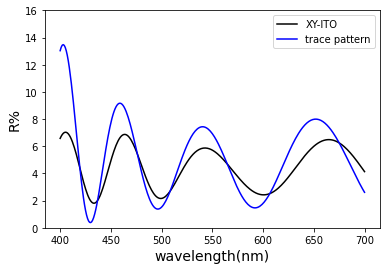

0.03932956071960506
0.013478011412716307


In [11]:
#plt.plot(wl, 100*hypo_bri(sol.x, wl, 5), '-r',label = 'bridge')
plt.plot(wl, 100*hypo(sol.x, wl, 5), '-k',label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(sol.x, wl, 5), '-b',label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('TPK_dbt.png')
plt.ylim(0, 16)
plt.show()

delta_d_b = sum(abs(hypo_bri(sol.x, wl, 5)-hypo(sol.x, wl, 5)))/301
delta_d_t = sum(abs(hypo_tra(sol.x, wl, 5)-hypo(sol.x, wl, 5)))/301
print(delta_d_b)
print(delta_d_t)